<h1 align="center">Data Analytics and Machine Learning Problems</h1> 




# Problem Set 1 
### Question 1.1: On plots and regression planes 

Use the imports-85.csv: The data is taken from  the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/index.php. 


1. Use matplotlib to visualize the relationship between price and horsepower and body 
style. Price is the dependent variable. Consider both the "log()" and "^2" 
transformations of price as dependent variables. Does the body style variable appear 
to be relevant for car prices, above and beyond horsepower? 

In [2]:
import os
import matplotlib.pyplot as plt
import pandas            as pd
import numpy             as np
import seaborn           as sns
from scipy.stats import rankdata
import statsmodels.formula.api as smf
from linearmodels.panel        import PanelOLS, FamaMacBeth
from patsy                     import dmatrices


import_85 = r"C:\Users\user\Documents\Machine Learning\imports-85.csv"

df_85 = pd.read_csv(import_85, index_col=0)
df_85 = df_85.reset_index()
df_85.describe()
df_85.shape
df_85.columns


Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

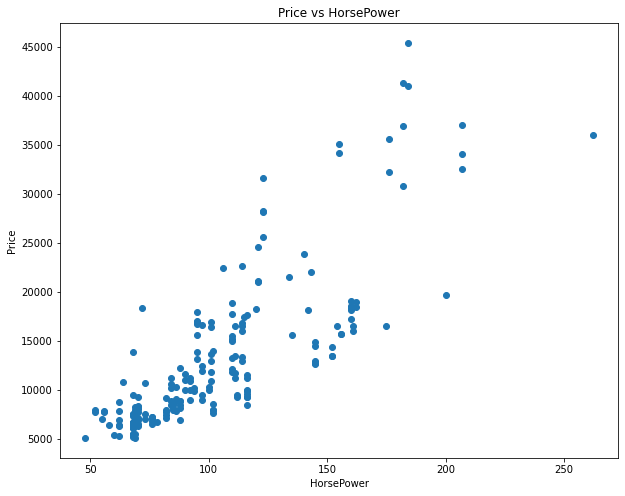

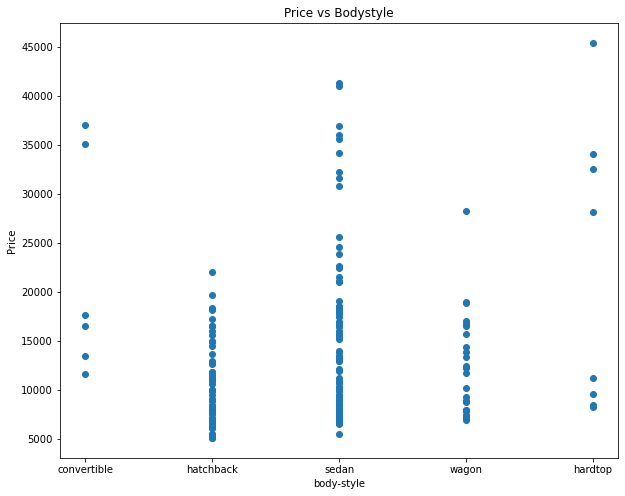

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


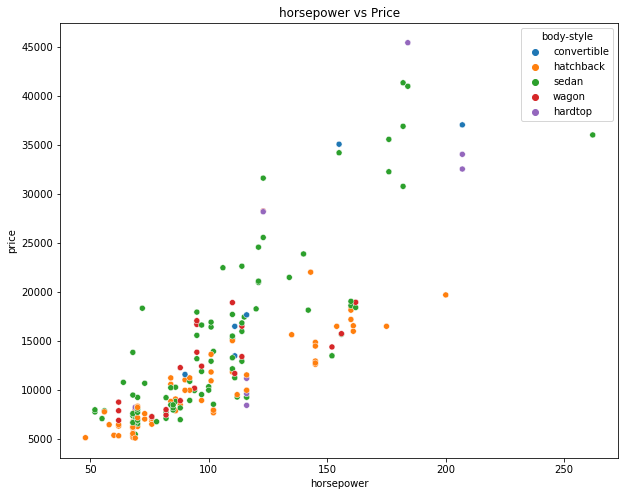

<Figure size 720x576 with 0 Axes>

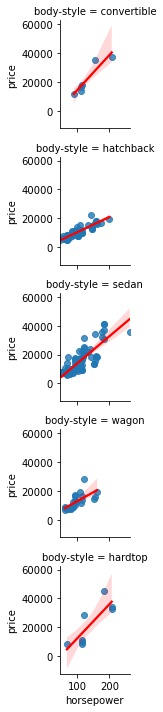

In [3]:

plt.figure(figsize=(10,8))
plt.scatter(df_85['horsepower'], df_85['price'])
plt.xlabel('HorsePower')
plt.ylabel("Price")
plt.title("Price vs HorsePower")
plt.show()


plt.figure(figsize=(10,8))
plt.scatter(df_85['body-style'], df_85['price'])
plt.xlabel('body-style')
plt.ylabel("Price")
plt.title("Price vs Bodystyle")
plt.show()

# Lets now use Seaborn to make a bit more sense of this

plt.figure(figsize=(10,8))
ax = sns.scatterplot(x = 'horsepower', y = 'price', data = df_85,
                     color = 'blue', hue = 'body-style')
ax.set(xlabel = 'horsepower', 
       ylabel = 'price',
       title = 'horsepower vs Price')

plt.figure(figsize=(10,8))
ax = sns.FacetGrid(df_85, row = 'body-style', size=(2))
ax.map(sns.regplot, 'horsepower', 'price', line_kws = {'color': 'red'})

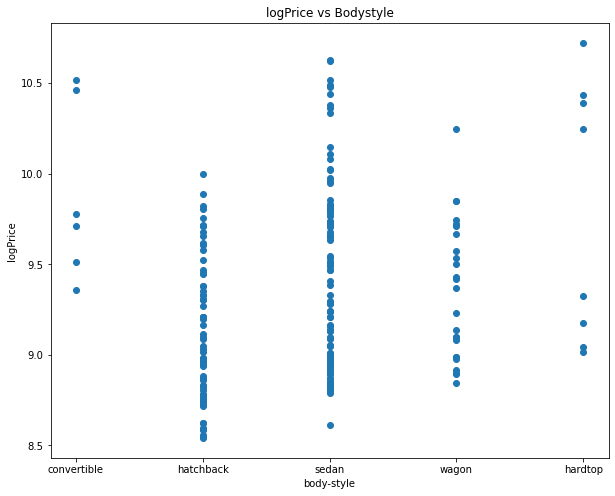

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


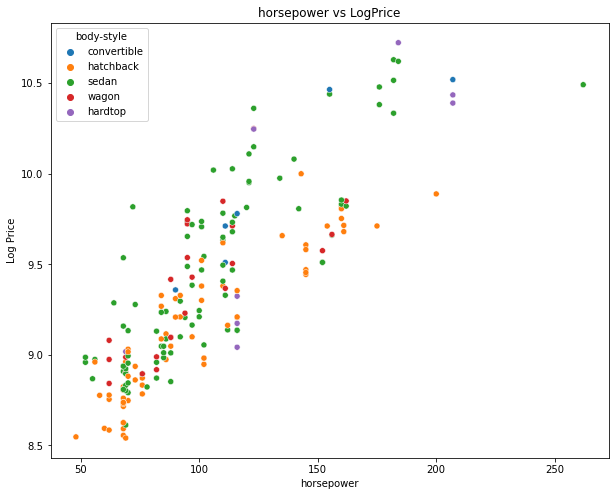

<Figure size 720x576 with 0 Axes>

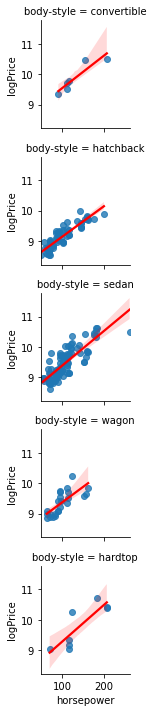

In [4]:
# This certainly appearts that we have different means. lets ln this. 

df_85['logPrice'] = np.log(df_85['price'])
df_85['PriceSquared'] = df_85['price']**2
# These look a little bit better with transformation log price. 
plt.figure(figsize=(10,8))
plt.scatter(df_85['body-style'], df_85['logPrice'])
plt.xlabel('body-style')
plt.ylabel("logPrice")
plt.title("logPrice vs Bodystyle")
plt.show()

plt.figure(figsize=(10,8))
ax = sns.scatterplot(x = 'horsepower', y = 'logPrice', data = df_85,
                     color = 'blue', hue = 'body-style')
ax.set(xlabel = 'horsepower', 
       ylabel = 'Log Price',
       title = 'horsepower vs LogPrice')

plt.figure(figsize=(10,8))
ax = sns.FacetGrid(df_85, row = 'body-style', size=(2))
ax.map(sns.regplot, 'horsepower', 'logPrice', line_kws={'color': 'red'})
# -------------------------------------------------------------------------

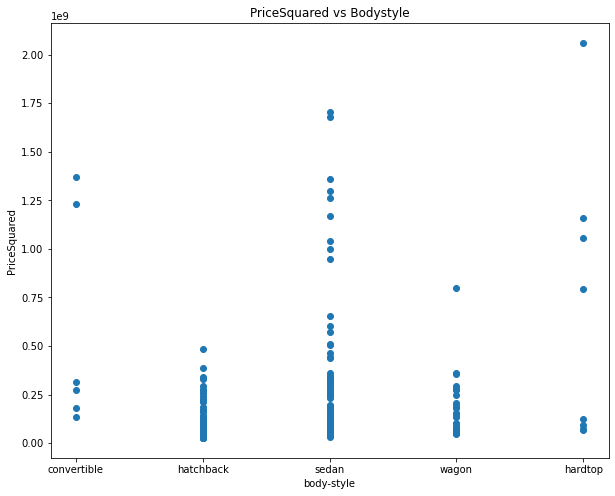

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


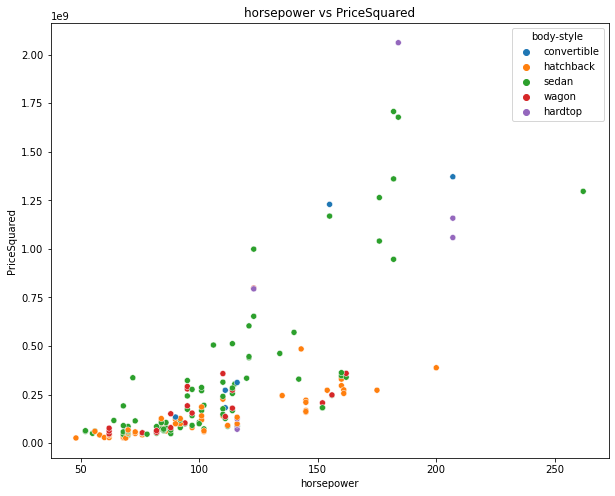

<Figure size 720x576 with 0 Axes>

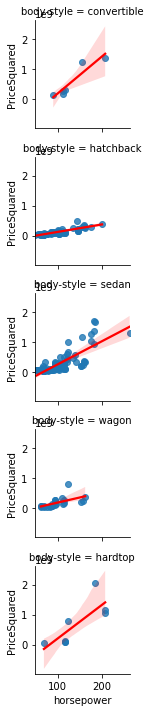

In [5]:
# Lets look at price squared

plt.figure(figsize=(10,8))
plt.scatter(df_85['body-style'], df_85['PriceSquared'])
plt.xlabel('body-style')
plt.ylabel("PriceSquared")
plt.title("PriceSquared vs Bodystyle")
plt.show()


plt.figure(figsize=(10,8))
ax = sns.scatterplot(x = 'horsepower', y = 'PriceSquared', data = df_85,
                     color = 'blue', hue = 'body-style')
ax.set(xlabel = 'horsepower', 
       ylabel = 'PriceSquared',
       title = 'horsepower vs PriceSquared')

plt.figure(figsize=(10,8))
ax = sns.FacetGrid(df_85, row = 'body-style', size=(2))
ax.map(sns.regplot, 'horsepower', 'PriceSquared', line_kws = {'color': 'red'})

# This somewhat linearized the model but not to the degree that Log Price did. 
# ------------------------------------------------------------------------------

### Analysis

It certianly appeared that log transforming the price improved the estimates and linearized the the f(x) onto Y mapping.  I'd say taking the log appeared to do a much better job at linearizing than the regular price or price squared. 

--------

### 1.2

Run a regression of your preferred specification. Perform residual diagnostics as you 
learned in Econometrics. What do you conclude from your regression diagnostic plots 
of residuals vs. fitted and residuals vs. horsepower? (Hint: You may want to use a 
seaborn_qqplot and scipy.stats packages for qqplot)


                            OLS Regression Results                            
Dep. Variable:               logPrice   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     446.9
Date:                Fri, 08 Apr 2022   Prob (F-statistic):           1.47e-52
Time:                        10:36:35   Log-Likelihood:                -27.845
No. Observations:                 199   AIC:                             59.69
Df Residuals:                     197   BIC:                             66.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.1949      0.058    140.772      0.0

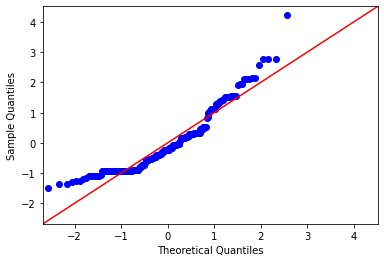

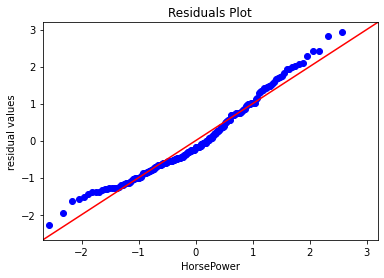

In [6]:

# B
#import statsmodels for regression
import statsmodels.api as sm
import scipy.stats as stats

#run regression
mod = sm.OLS(df_85['logPrice'], sm.add_constant(df_85['horsepower']), missing = 'drop')
out= mod.fit()
print(out.summary())

#  Lets get White Standard Errors since Lars will be watching
white_mod = sm.OLS(df_85['logPrice'], sm.add_constant(df_85['horsepower']),
                   missing = 'drop').fit(cov_type='HC0')

print(white_mod.summary())

# Here we see that horsepower coefficient appears to be fairly properly specified to 
#  fit the Log Price and that there could be a linear relationship.

# Running residual diagnostics residuals vs fitted. Checking normality/qqplot
residuals = out.resid
fitted = out.fittedvalues
# I'm checking whether both fitted and residuals, for the most part, follow a normal dist. 
sm.qqplot(fitted , line='45', fit = True, dist = stats.norm)
sm.qqplot(residuals, line = '45', fit= True, dist = stats.norm)

# Make a residual plot
plt.scatter(df_85['horsepower'].iloc[6:], residuals)
plt.xlabel("HorsePower")
plt.ylabel("residual values")
plt.title('Residuals Plot')
plt.show()




### Analysis

This shows signs of being a normal distribution. The 3rd and 4th moment of the summary result do not appear skewed or have excess kurtosis. 

### 1.3


Now use matplotlib to visualize the relationship between fuel efficiency (city-mpg) and 
horsepower. Now regress city.mpg on horsepower. Is the regression result consistent 
with the conclusion you would draw based on the plot? More on this next week. 
Note: Make sure that your continuous variables are in numeric form.

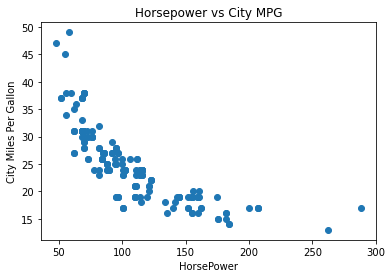

                            OLS Regression Results                            
Dep. Variable:               city-mpg   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     366.5
Date:                Fri, 08 Apr 2022   Prob (F-statistic):           3.49e-47
Time:                        10:36:35   Log-Likelihood:                -564.37
No. Observations:                 203   AIC:                             1133.
Df Residuals:                     201   BIC:                             1139.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.1031      0.775     50.482      0.0

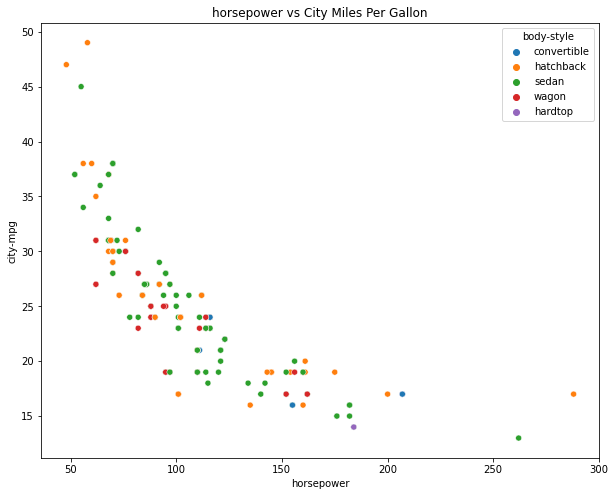

In [7]:
# Fuel Efficiency vs Horsepower Matplotlib. 
plt.scatter(df_85['horsepower'], df_85['city-mpg'])
plt.xlabel("HorsePower")
plt.ylabel("City Miles Per Gallon")
plt.title('Horsepower vs City MPG')
plt.show()


# This looks better. hardtop and hatchbacks are not good. 
plt.figure(figsize=(10,8))
ax = sns.scatterplot(x = 'horsepower', y = 'city-mpg', data = df_85,
                     color = 'blue', hue = 'body-style')
ax.set(xlabel = 'horsepower', 
       ylabel = 'city-mpg',
       title = 'horsepower vs City Miles Per Gallon')


#run regression
mod = sm.OLS(df_85['city-mpg'], sm.add_constant(df_85['horsepower']), missing = 'drop')
out= mod.fit()
print(out.summary())



### Analysis

This does not look normally distributed. The moments are highly skewed and the 4th moment is large.  I am pleased to see a low SE albeit OLS SE
and the horsepower coefficient is negative which is a good thing as it is represented accurately in the graph. 

--------



# Question 2 : Nonlinear relations 

A common concern is that the relationship between a predictive variable (X) and the outcome 
we are trying to predict $(Y)$ is nonlinear. On the surface, this seems to invalidate 
linear regressions, such as the Fama-MacBeth regression. However, this is not generally the 
case. For instance, if $Y = f(X) + \epsilon$, where $f(.)$ is not linear in $X$, simply define a 
transformation of $X$ as, generally, $Z = a + bf(X)$. Now, it is clear that $Y = a1 + b1*Z$, for 
constants a, a1, b, and b1. In other words, one could include squared values of X in the 
regression, perhaps $max(0,X)$, etc. We will see this in action for the case of Issuance (lnIssue). This is the average amount of 
stock issuance in the last 36 months, normalized by market equity. Generally, firms that issue a lot of equity have low returns going forward. 

### 2.a

Construct decile sorts (10 portfolios) as in the class notes, but now based on the 
issuance variable lnIssue. Give the average return to each decile portfolio, value-weighting stocks within each portfolio each year, equal-weighting across years. 




In [8]:
sns.set_style('darkgrid')

stocks = r"C:\Users\user\Documents\Machine Learning\StockRetAcct_DT.csv"
StockRetAcct_DT = pd.read_csv(stocks)

# I will do A two ways to compare.  
# TA Way

StockRetAcct_DT.columns
StockRetAcct_DT.describe()
StockRetAcct_DT.isnull().nunique().sort_values(ascending=False)
StockRetAcct_DT.head()


# First create excess returns
StockRetAcct_DT['ExRet']= StockRetAcct_DT.apply(lambda x: np.exp(x['lnAnnRet']) - np.exp(x['lnRf']), axis = 1)
# second get the portfolio deciles each year for the time series. 
StockRetAcct_DT['lnIssue_10_decile'] =np.nan
for year in range(1981, 2015):
    dt = StockRetAcct_DT[StockRetAcct_DT['year'] == year]
    #  ohhh this conditional in itself when used with np.where maps to zeros 
    inds = np.where(StockRetAcct_DT['year'] == year)
    # here we are filling up the np.nan object it seems. dt is the DF for that particular year 
    StockRetAcct_DT['lnIssue_10_decile'].iloc[inds] = pd.qcut(dt['lnIssue'], 10, labels = np.arange(1,11,1)).values.to_list() 

# remove na
StockRetAcct_DT = StockRetAcct_DT[StockRetAcct_DT['lnIssue_10_decile'].notna()]
# print(StockRetAcct_DT['lnIssue_10_decile'])

# average each year of portfolios, then average over the years. 
EW_lnIssuance_decile_yr = pd.DataFrame({'lnIssue_10_decile':np.tile(range(1,11), 34),
                                  'year':np.sort(np.tile(range(1981,2015),10)),
                                  'MeanExRetYr':np.empty(((2014-1981+1)*10))})

for year in range(min(StockRetAcct_DT['year']), max(StockRetAcct_DT['year'] + 1)):
    #  This guy gives me the dataframe of each year with all the portfolio and exret data
    dt = StockRetAcct_DT[StockRetAcct_DT['year'] == year]
    # This guy gives me the year mapping in my new dataframe i created above
    inds = np.where(EW_lnIssuance_decile_yr['year'] == year)
    #  this is giving the average excess return per decile and send it to the mapping for each year. Store in EW_yr DF
    EW_lnIssuance_decile_yr['MeanExRetYr'].iloc[inds] = list(dt.groupby('lnIssue_10_decile')['ExRet'].mean())
    
print(f"This is the value_weighted return per year: {EW_lnIssuance_decile_yr[['MeanExRetYr','year']]}\n")
# Finally take average for each bin across years
EW_lnIssuance_decile_yr = EW_lnIssuance_decile_yr.groupby('lnIssue_10_decile')['MeanExRetYr'].mean()

print(f"This is the value_weighted return equally weighted accross the time series: {EW_lnIssuance_decile_yr}.")


C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

This is the value_weighted return per year:      MeanExRetYr  year
0      -0.196050  1981
1      -0.219086  1981
2      -0.291431  1981
3      -0.271338  1981
4      -0.272522  1981
..           ...   ...
335     0.011997  2014
336     0.006231  2014
337     0.088734  2014
338     0.105056  2014
339     0.086498  2014

[340 rows x 2 columns]

This is the value_weighted return equally weighted accross the time series: lnIssue_10_decile
1     0.110398
2     0.093631
3     0.084439
4     0.090071
5     0.092172
6     0.103268
7     0.096026
8     0.094350
9     0.079348
10    0.039357
Name: MeanExRetYr, dtype: float64.


C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

In [9]:
# For thoroughness we can apply a much faster method.  The above helps me see what's happening. 
StockRetAcct_DT['lnIssuePortfolio'] = StockRetAcct_DT.groupby(['year'])['lnIssue'].transform(
    lambda x: pd.qcut(x, 10, labels = range(1,11,1)))
# Drop missing values
StockRetAcct_DT = StockRetAcct_DT[StockRetAcct_DT['lnIssuePortfolio'].notna()]

# mean excess return by decile (Taking the average return in each vingtile)
EW_lnIssuance_decile = StockRetAcct_DT.groupby('lnIssuePortfolio')['ExRet'].mean()




###  Equal Weighted Returns Yield the following results.

In [10]:
# equal weighting each year
ret = np.empty([])
for year in range(min(StockRetAcct_DT['year']),max(StockRetAcct_DT['year'])+1):
    dt  = StockRetAcct_DT[StockRetAcct_DT['year']==year]
    for bin in range(1,11):
#         This is for readability.  We would want to do an apply.(lambda ) function at the minium to speed this up. 
        wt  = dt[dt['lnIssue_10_decile']==bin]['MEwt']/dt[dt['lnIssue_10_decile']==bin]['MEwt'].sum()
        ret = np.append(ret,sum(dt[dt['lnIssue_10_decile']==bin]['ExRet']*wt))

ew_excess_rtr = np.mean(ret[1:].reshape((34,10)),axis=0) 
ew_excess_rtr.reshape(10,1)
len(ret[1:])

print(f"The equal weighted returns accross the years are: \n \
{ew_excess_rtr}.")

The equal weighted returns accross the years are: 
 [0.11439869 0.07938272 0.07367327 0.08198971 0.10387489 0.08157707
 0.08157806 0.06270775 0.07462491 0.03296523].


### 2.b
Plot the average return to these 10 portfolios, similar to what we did in the Topic 1(ef) notes. Discuss whether the pattern seems linear or not. 


[Text(0.5, 1.0, 'Log Stock Issuance VS Excess Returns'),
 Text(0.5, 0, 'Value_weighted')]

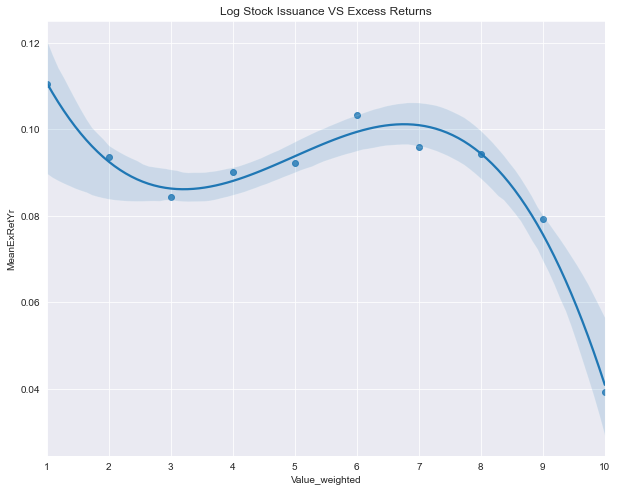

In [11]:
# B Graph this
plt.figure(figsize=(10,8))
ax = sns.regplot(x = np.arange(1,11), y = EW_lnIssuance_decile_yr, fit_reg=True, order = 3)
ax.set(title = "Log Stock Issuance VS Excess Returns", xlabel = "Value_weighted")
#  This does not seem linear rather a third order polynomial fit.  Perhaps
#  we can transform f() is not linear in X and we can transform this again or
# perhaps we need a non-linear method. to work with the data. 


[Text(0.5, 1.0, 'Log Stock Issuance VS Excess Returns'),
 Text(0.5, 0, 'Equal Weighted')]

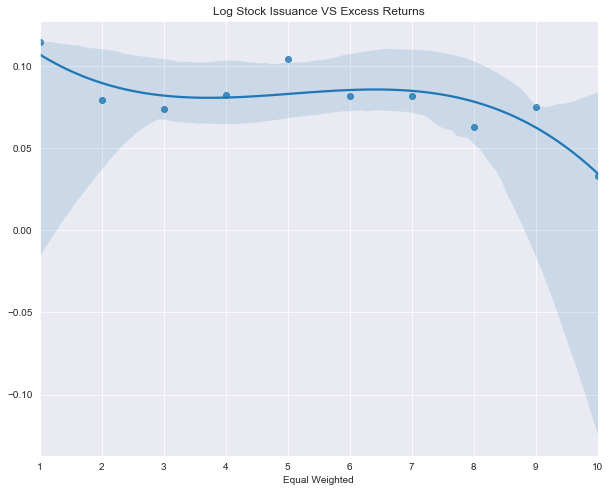

In [12]:
# B Graph this
plt.figure(figsize=(10,8))
ax = sns.regplot(x = np.arange(1,11), y = ew_excess_rtr, fit_reg=True, order = 3)
ax.set(title = "Log Stock Issuance VS Excess Returns", xlabel = "Equal Weighted")
#  This does not seem linear rather a third order polynomial fit.  Perhaps
#  we can transform f() is not linear in X and we can transform this again or
# perhaps we need a non-linear method. to work with the data. 


### 2.c 
Since most of the 'action' is in the extreme portfolios, consider a model where expected returns to stocks is linear in a transformed issuance-characteristic that takes three values: -1 if the stock's issuance is in Decile 1, 1 if the stock's issuance is in decile 
10, and 0 otherwise. 


In [13]:

StockRetAcct_DT['TransIC'] = np.select([(StockRetAcct_DT['lnIssue_10_decile']==1),(StockRetAcct_DT['lnIssue_10_decile']==10)],[-1,1],0)
StockRetAcct_DT

# OLS function
def ols_coef(x,formula):
    return smf.ols(formula,data=x).fit().params



ols = StockRetAcct_DT.groupby('year').apply(ols_coef, 'ExRet~TransIC')

print(f"Crossectional DataFrame:\n \
      {ols}.\n")


print('Mean Return: ', str(ols['TransIC'].mean())+'\n', 
      'Std Dev:      ', str(ols['TransIC'].std())+'\n', 
      'Sharpe Ratio ', str(ols['TransIC'].mean()/
                       ols['TransIC'].std())+'\n',
      't-stat:      ', str(35**.5*(ols['TransIC'].mean())/ols['TransIC'].std()), 
      sep="\n")




Crossectional DataFrame:
             Intercept   TransIC
year                     
1981  -0.267427 -0.059435
1982   0.662464 -0.041281
1983  -0.189961 -0.112851
1984   0.187049 -0.013442
1985   0.277408 -0.061174
1986   0.070560 -0.088052
1987  -0.104626 -0.073075
1988   0.083191 -0.054317
1989  -0.013624  0.002704
1990  -0.031698 -0.057755
1991   0.086996 -0.028510
1992   0.194517 -0.013088
1993  -0.000169 -0.057423
1994   0.164405 -0.014413
1995   0.176479  0.016701
1996   0.144827 -0.103839
1997   0.153488 -0.044644
1998  -0.009380 -0.074904
1999   0.071005  0.084890
2000   0.053643 -0.219345
2001  -0.096181 -0.190520
2002  -0.012794  0.000851
2003   0.301755  0.033406
2004   0.101520 -0.028814
2005   0.103972  0.024159
2006   0.135201 -0.002478
2007  -0.173279  0.034502
2008  -0.263574 -0.050682
2009   0.244883  0.021021
2010   0.389851 -0.014860
2011  -0.020867 -0.045024
2012   0.263584  0.021399
2013   0.259332  0.002913
2014   0.061091 -0.000317.

Mean Return: 
-0.0355205673547

 ### Analysis
 The above IS FAMA Macbeth.  Fama backbeth Takes the paramter estimates at every cross-section and by taking averages across all times we get the paramter estimates. 
 
Next, I actually believe we do have a strategy.  UPON ANALYSIS of our portfolios we would simply switch the manner in how we went long and short the portfolios as the code shows below shows.  upon that structure we would get a positive return with the strategy. we simply long and short the opposite poles. This makes sense.  Stock issuance should in theory reduce the expected return.  
 
 See as follows:
 

In [14]:

StockRetAcct_DT['TransIC'] = np.select([(StockRetAcct_DT['lnIssue_10_decile']==1),(StockRetAcct_DT['lnIssue_10_decile']==10)],[1,-1],0)
StockRetAcct_DT

# OLS function
def ols_coef(x,formula):
    return smf.ols(formula,data=x).fit().params
ols = StockRetAcct_DT.groupby('year').apply(ols_coef, 'ExRet~TransIC')
print(f"Crossectional DataFrame:\n \
      {ols}.\n")
print('Mean Return: ', str(ols['TransIC'].mean())+'\n', 
      'Std Dev:      ', str(ols['TransIC'].std())+'\n', 
      'Sharpe Ratio ', str(ols['TransIC'].mean()/
                       ols['TransIC'].std())+'\n',
      't-stat:      ', str(35**.5*(ols['TransIC'].mean())/ols['TransIC'].std()), 
      sep="\n")

Crossectional DataFrame:
             Intercept   TransIC
year                     
1981  -0.267427  0.059435
1982   0.662464  0.041281
1983  -0.189961  0.112851
1984   0.187049  0.013442
1985   0.277408  0.061174
1986   0.070560  0.088052
1987  -0.104626  0.073075
1988   0.083191  0.054317
1989  -0.013624 -0.002704
1990  -0.031698  0.057755
1991   0.086996  0.028510
1992   0.194517  0.013088
1993  -0.000169  0.057423
1994   0.164405  0.014413
1995   0.176479 -0.016701
1996   0.144827  0.103839
1997   0.153488  0.044644
1998  -0.009380  0.074904
1999   0.071005 -0.084890
2000   0.053643  0.219345
2001  -0.096181  0.190520
2002  -0.012794 -0.000851
2003   0.301755 -0.033406
2004   0.101520  0.028814
2005   0.103972 -0.024159
2006   0.135201  0.002478
2007  -0.173279 -0.034502
2008  -0.263574  0.050682
2009   0.244883 -0.021021
2010   0.389851  0.014860
2011  -0.020867  0.045024
2012   0.263584 -0.021399
2013   0.259332 -0.002913
2014   0.061091  0.000317.

Mean Return: 
0.03552056735473

In [15]:

# StockRetAcct_DT['c']     = 1

# # Add industry dummies to dataset
# StockRetAcct_DT['Ind']= StockRetAcct_DT['ff_ind'].astype(object)
# StockRetAcct_DT = StockRetAcct_DT.join(pd.get_dummies(StockRetAcct_DT['Ind'],drop_first=False))
# # StockRetAcct_DT =  StockRetAcct_DT.set_index(['FirmID','year'])

# print(len(StockRetAcct_DT))

# y, X  = dmatrices('ExRet~TranIss', StockRetAcct_DT, return_type = 'dataframe')
# fama = FamaMacBeth(y,X).fit()
# print(fama.summary())

# Question 3 : Double-sorts and functional forms 

In the lecture notes we saw that the value spread is much larger for small stocks. Using this 
fact, I proposed a model where expected returns are linear in the book-to-market ratio as 
well as the interaction between book-to-market and size. In other words, holding size 
constant there is a linear relation between expected stock returns and book-to-market. 
In this question, we will dig deeper into whether this is a reasonable assumption or not 
based on visual analysis. 

### 3.a. 
Create independent quintile sorts based on book-to-market (lnBM) and size (lnME). 
That is create a quintile variable by year for book-to-market and then create a quintile 
variable by year for size. 


In [63]:
# quintile sorts based on lnBM. This is going in every year and breaking this out into quintiles. 
StockRetAcct_DT['book_mkt_portfolio']= StockRetAcct_DT.groupby(['year'])['lnBM'].transform(lambda x: pd.qcut(x, 5, labels= range(1, 6)))
StockRetAcct_DT = StockRetAcct_DT[StockRetAcct_DT['book_mkt_portfolio'].notna()]

# quintile sorts based on lnME
StockRetAcct_DT['market_equity_portfolio']= StockRetAcct_DT.groupby(['year'])['lnME'].transform(lambda x: pd.qcut(x, 5, labels= range(1, 6)))
StockRetAcct_DT = StockRetAcct_DT[StockRetAcct_DT['market_equity_portfolio'].notna()]

Ex_rtr_BM_ME = pd.DataFrame(StockRetAcct_DT.groupby(['book_mkt_portfolio', 'market_equity_portfolio'])['ExRet'].mean()).reset_index()


Ex_rtr_BM_ME


,book_mkt_portfolio,market_equity_portfolio,ExRet
0,1,1,0.041307
1,1,2,0.051527
2,1,3,0.055639
3,1,4,0.101076
4,1,5,0.079677
5,2,1,0.063340
6,2,2,0.074939
7,2,3,0.086054
8,2,4,0.074159
9,2,5,0.070739


### 3. b. 
For each size quintile, plot the average returns to the five book-to-market quintile 
portfolios. So, for size quintile 1, and book-to-market quintile 3, the stocks in this 
portfolio all have size quintile equal to 1 and book-to-market quintile equal to 3. Thus, 
I'm looking for five plots here, one for each size quintile. 
Does the assumption of conditional linearity seem ok, or would you suggest a different 
model? 

------------

### ANALYSIS

Judging my how my notebook is not likeing this fit I would say we would need a new model other than an order 2 or an order 3 graph to plot tis appropriately

C:\Users\user\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\user\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\user\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\user\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\user\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\user\anaconda3\lib\site-packages\seaborn\algorithms.py:85: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
C:\Users\user\anaconda3\lib\site-p

<Figure size 720x720 with 0 Axes>

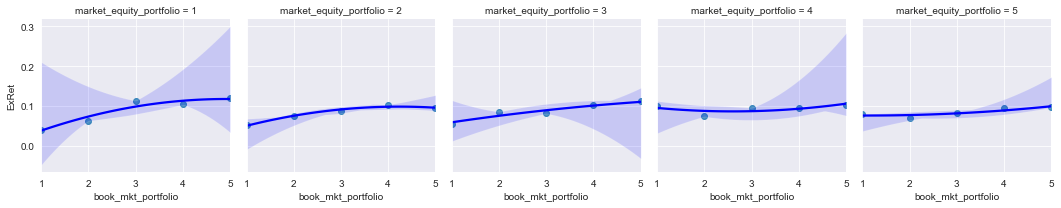

In [67]:
#  Unsure Why this is freaking out.
plt.figure(figsize=(10,10))
ax   = sns.FacetGrid(Ex_rtr_BM_ME, col="market_equity_portfolio")
ax.map(sns.regplot, 'book_mkt_portfolio','ExRet', line_kws = {'color':"blue"}, fit_reg = True, order = 3)